# dataset
## student info:
This file contains demographic information about the students together with their results. File contains the following columns:
    1. code_module – an identification code for a module on which the student is registered.
    2. code_presentation - the identification code of the presentation during which the student is registered on the module.
    3. id_student – a unique identification number for the student.
    4. gender – the student’s gender.
    5. region – identifies the geographic region, where the student lived while taking the module-presentation.
    6. highest_education – highest student education level on entry to the module presentation.
    7. imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module presentation.
    8.  age_band – band of the student’s age.
    9.  num_of_prev_attempts – the number times the student has attempted this module.
    10. studied_credits – the total number of credits for the modules the student is currently studying.
    11. disability – indicates whether the student has declared a disability.
    12. final_result – student’s final result in the module-presentation.
## courses
    1. code_module – code name of the module, which serves as the identifier.
    2. code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
    3. length - length of the module-presentation in days.
## studentRegistration.csv
    1. code_module – an identification code for a module.
    2. code_presentation - the identification code of the presentation.
    3. id_student – a unique identification number for the student.
    4. date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
    5. date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
## studentAssessment.csv
    1. This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:
    2. id_assessment – the identification number of the assessment.
    3. id_student – a unique identification number for the student.
    4. date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
    5. is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
    6. score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.
## assesments
       1. code_module – identification code of the module, to which the assessment belongs.
        2.code_presentation - identification code of the presentation, to which the assessment belongs.
        3. id_assessment – identification number of the assessment.
       4. assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
       5. date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
        6. weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.
   

In [2]:
#loading the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from pandas_profiling import ProfileReport

In [3]:
courses=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/courses.csv')
studentinfo=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/studentInfo.csv')
studentReg=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/studentRegistration.csv')
assesments=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/assessments.csv')
vle=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/vle.csv')
studentvle=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/studentVle.csv')
studentassesment=pd.read_csv('C:/Users/HP-PC/Desktop/PClub summer of code/DATASETS/Open University Learning Analytics dataset/studentAssessment.csv')

In [4]:
studentinfo.shape

(32593, 14)

In [8]:
# Report of the dataset
profile=ProfileReport(studentinfo)
profile.to_file("report.html")

In [15]:
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


There are totally seven courses each conducted for two semester during 2013 and 2014.J represents the course conducted during the october and B for feburary. 

In [10]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,semester,year
0,AAA,2013-J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,J,2013
1,AAA,2013-J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,J,2013
2,AAA,2013-J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,J,2013
3,AAA,2013-J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,J,2013
4,AAA,2013-J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,J,2013


In [25]:
len(studentinfo['id_student'].unique()) # There are students studying more than one course
print("The total number of students sttudying more than one course", studentinfo.shape[0]-len(studentinfo['id_student'].unique()))

The total number of students sttudying more than one course 3808


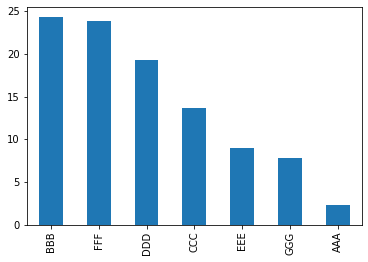

In [34]:
# percentage of total students enrolled in each course
studentinfo.code_module.value_counts(normalize=True).mul(100).plot(kind='bar')

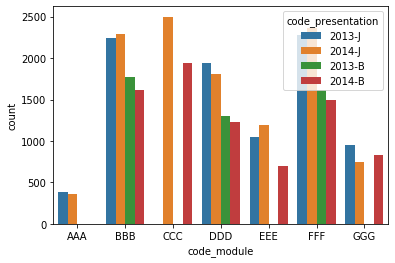

In [58]:
sns.countplot(studentinfo['code_module'],hue=studentinfo['code_presentation'])
#df2 = studentinfo.melt(value_vars=studentinfo.columns)


In [136]:
studentinfo[studentinfo['id_student']==1993672]# there are students who have attempted many times still have failed

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,semester,year,Morethanone
2376,BBB,2013-B,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,3,60,Y,Withdrawn,B,2013,False
4592,BBB,2013-J,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,4,60,Y,Withdrawn,J,2013,True
8521,BBB,2014-J,1993672,F,West Midlands Region,Lower Than A Level,0-10%,35-55,5,60,Y,Fail,J,2014,True


In [105]:
studentinfo[studentinfo['id_student']==147756] #There are students who have failed in their previous semester and took the course again to pass the next semester

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,semester,year,Morethanone
53,AAA,2013-J,147756,M,North Region,Lower Than A Level,60-70%,0-35,0,120,N,Fail,J,2013,False
429,AAA,2014-J,147756,M,North Region,Lower Than A Level,60-70%,0-35,1,120,N,Pass,J,2014,True


   1.  We can see from the second graph that there is more number of students enrolled in the course BBB and FFF because that course was conducted in both year and in both semesters.But other courses except DDD .
        
      i) AAA- only during the october semesters
   ii) CCC- started during the year 2014 only 
      iii) EEE and GGG - started from october of 2013 may be thats why there is no record for the february
   2. We can also see during the year 2014 and especially in the semester october more number of students have joined when compared to the year 2013.
   3. The count which shows here is not exactly correct. since there are duplicates as many students have registered again to the course in the next semester.
   4. There is no students who have registered in more than one course at the same time

# GOAL: student performance prediction 
# Taking the course AAA alone

In [255]:
studentinfo=studentinfo[studentinfo['code_module']=='AAA']
studentinfo_cleaned= studentinfo.drop_duplicates(subset='id_student',keep='last')
studentinfo_cleaned.shape

(712, 15)

The students who have previously withdrawn or previously failed have again registered to pass. since our aim is to detect the student in the early stage and help them so, we have dropped the students who have registered again the next semester.

# ANALYSING THE STUDENTS PERFORMANCE

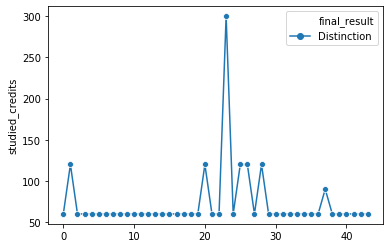

In [285]:
df=studentinfo_cleaned.groupby(['id_student','final_result'],as_index=False).mean()
#df=df[(df['final_result']!='Pass') & (df['final_result']!='Fail')]
df=df[df['final_result']=='Distinction']
sns.lineplot(range(0,len(df)),df['studied_credits'],hue='final_result',style='final_result',data=df,markers=True,dashes=False)

In [286]:
df['studied_credits'].describe()

count     44.000000
mean      72.954545
std       40.091729
min       60.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      300.000000
Name: studied_credits, dtype: float64

the students who got minimum of 60 also have secured distinction

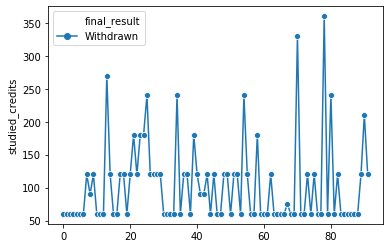

In [291]:
df=studentinfo_cleaned.groupby(['id_student','final_result'],as_index=False).mean()
df=df[df['final_result']=='Withdrawn']
sns.lineplot(range(0,len(df)),df['studied_credits'],hue='final_result',style='final_result',data=df,markers=True,dashes=False)

 This shows that students who have performed well also have withdrawn from the course.

# pair plot 

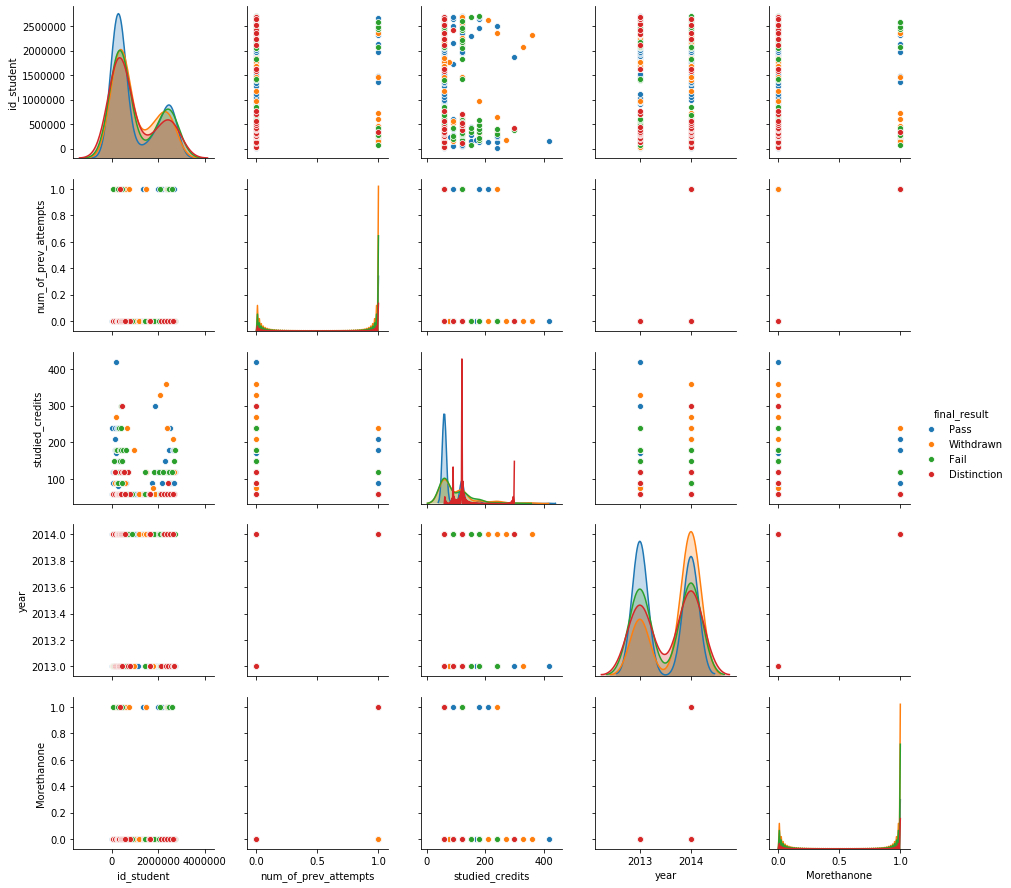

In [4]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,semester,year
0,AAA,2013-J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,J,2013
1,AAA,2013-J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,J,2013
2,AAA,2013-J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,J,2013
3,AAA,2013-J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,J,2013
4,AAA,2013-J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,J,2013


# MODELING
## ENCODING

In [9]:
# Only demographic features are taken into account
studentinfo['gender']=pd.get_dummies(studentinfo['gender'],drop_first=True)

In [10]:
studentinfo['region'].value_counts()

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64

In [11]:
data=pd.get_dummies(studentinfo['region'],drop_first=True)
data1=pd.get_dummies(studentinfo['highest_education'],drop_first=True)

In [12]:
data1.head()

,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,1,0,0


In [14]:
studentinfo['imd_band'].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

In [15]:
studentinfo['age_band'].value_counts()

0-35     22944
35-55     9433
55<=       216
Name: age_band, dtype: int64

In [12]:
data2=pd.get_dummies(studentinfo['age_band'],drop_first=True)

In [13]:
studentinfo['disability']=pd.get_dummies(studentinfo['disability'],drop_first=True)

 CONVERTING IT INTO BINARY CLASS CAUSE OR AIM IS TO FIND THE STUDENTS WHO ARE NOT ABLE TO PASS SO THAT THEY CAN BE GIVEN MORE ATTENTION

In [14]:
data={'Pass':0,'Withdrawn':1,'Fail':1,'Distinction':0}
studentinfo['final_result']=studentinfo['final_result'].map(data)

In [19]:
studentinfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,semester,year
0,AAA,2013-J,11391,1,East Anglian Region,HE Qualification,90-100%,55<=,0,240,0,0,J,2013
1,AAA,2013-J,28400,0,Scotland,HE Qualification,20-30%,35-55,0,60,0,0,J,2013
2,AAA,2013-J,30268,0,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,1,1,J,2013
3,AAA,2013-J,31604,0,South East Region,A Level or Equivalent,50-60%,35-55,0,60,0,0,J,2013
4,AAA,2013-J,32885,0,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,0,0,J,2013


In [15]:
studentinfo=studentinfo.drop(['region','highest_education','imd_band','age_band'],axis=1)

In [16]:
studentinfo['age1']=data2['35-55']
studentinfo['age2']=data2['55<=']

In [17]:
studentinfo['HE Qualification']=data1['HE Qualification']
studentinfo['Lower Than A Level']=data1['Lower Than A Level']
studentinfo['No Formal quals']=data1['No Formal quals']
studentinfo['Post Graduate Qualification']=data1['Post Graduate Qualification']

In [29]:
studentinfo.head()

,gender,num_of_prev_attempts,studied_credits,disability,final_result,age1,age2,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
0,1,0,240,0,0,0,1,1,0,0,0
1,0,0,60,0,0,1,0,1,0,0,0
2,0,0,60,1,1,1,0,0,0,0,0
3,0,0,60,0,0,1,0,0,0,0,0
4,0,0,60,0,0,0,0,0,1,0,0


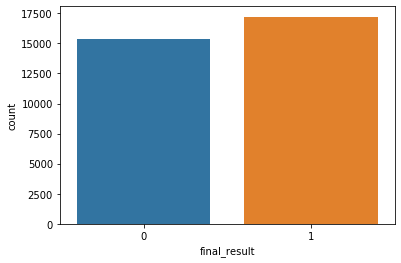

In [36]:
sns.countplot(studentinfo['final_result'])

# RANDOM FOREST

In [32]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
dataset=studentinfo.sample(frac=0.05)
random_forest=RandomForestClassifier()
#clf = GridSearchCV(random_forest,random_grid, cv=5)
#best_model = clf.fit(dataset.drop(['final_result'],axis=1),dataset['final_result'])

In [50]:
best_model.best_params_


{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [51]:
best_model.best_score_

0.598159509202454

In [27]:
dataset.drop(['code_module','code_presentation','id_student'],axis=1,inplace=True)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(dataset.drop(['final_result'],axis=1),dataset['final_result'],test_size=0.2,random_state=1)

In [30]:
random_forest=RandomForestClassifier(n_estimators=10,max_depth=60,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)

In [33]:
dataset['semester']=pd.get_dummies(dataset['semester'],drop_first=True)

In [36]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=60, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=10)

In [37]:
preds=random_forest.predict(x_test)

In [38]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       175
           1       0.60      0.71      0.65       151

    accuracy                           0.64       326
   macro avg       0.65      0.65      0.64       326
weighted avg       0.65      0.64      0.64       326



<AxesSubplot:>

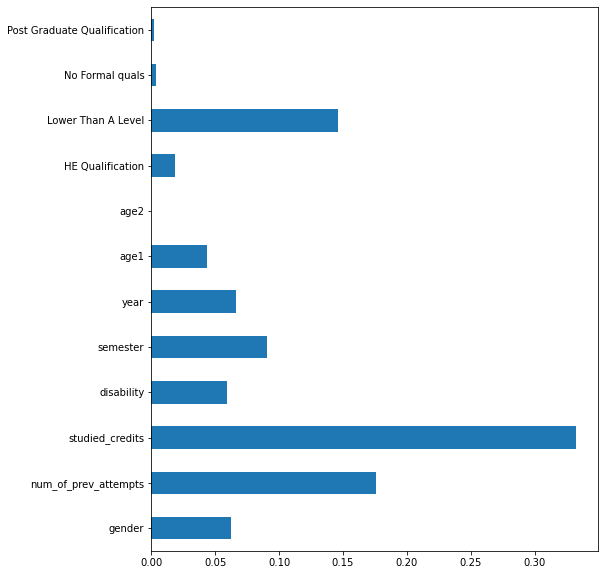

In [41]:
feat_imp = pd.Series(random_forest.feature_importances_, index=x_train.columns)
feat_imp.plot(kind='barh', figsize=(8,10))

# DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

# BEFORE PRUNING

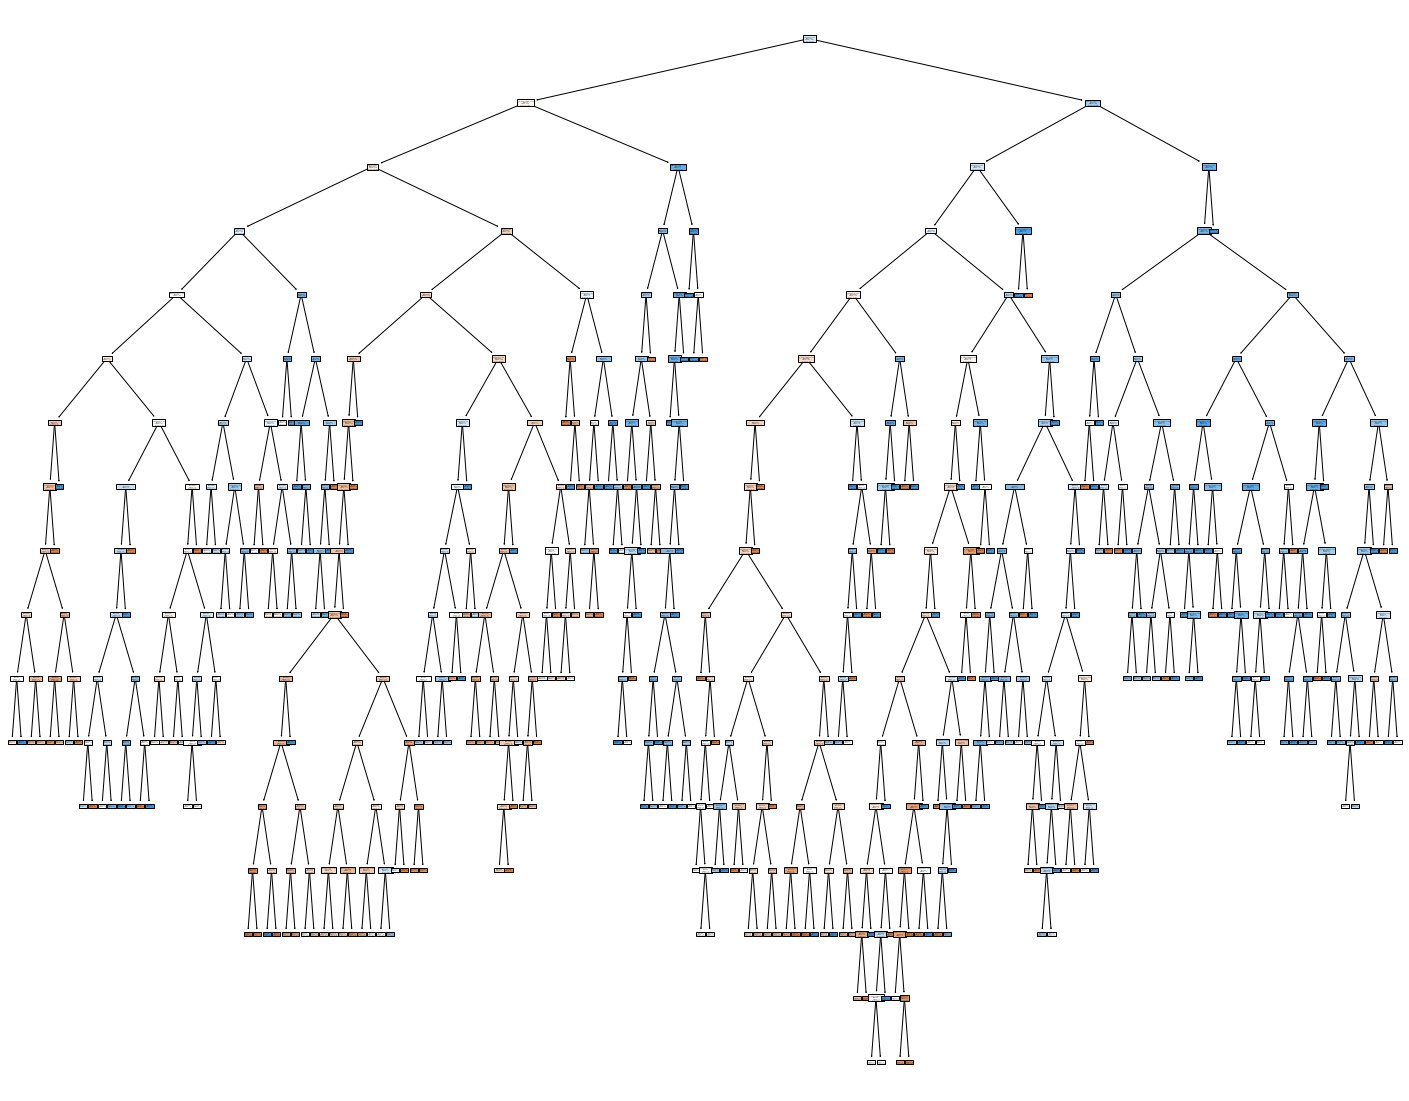

In [43]:
fig = plt.figure(figsize=(25,20))
fig_plot= tree.plot_tree(model, 
                   feature_names=dataset.drop(['final_result'],axis=1).columns,  
                         
                   filled=True)

In [44]:
path =model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.01433776266599851


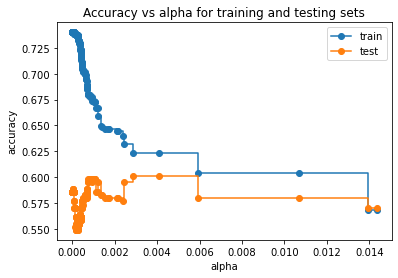

In [46]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [47]:
model=DecisionTreeClassifier(random_state=0,ccp_alpha=0.011171823439060091)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.011171823439060091, random_state=0)

# AFTER PRUNING

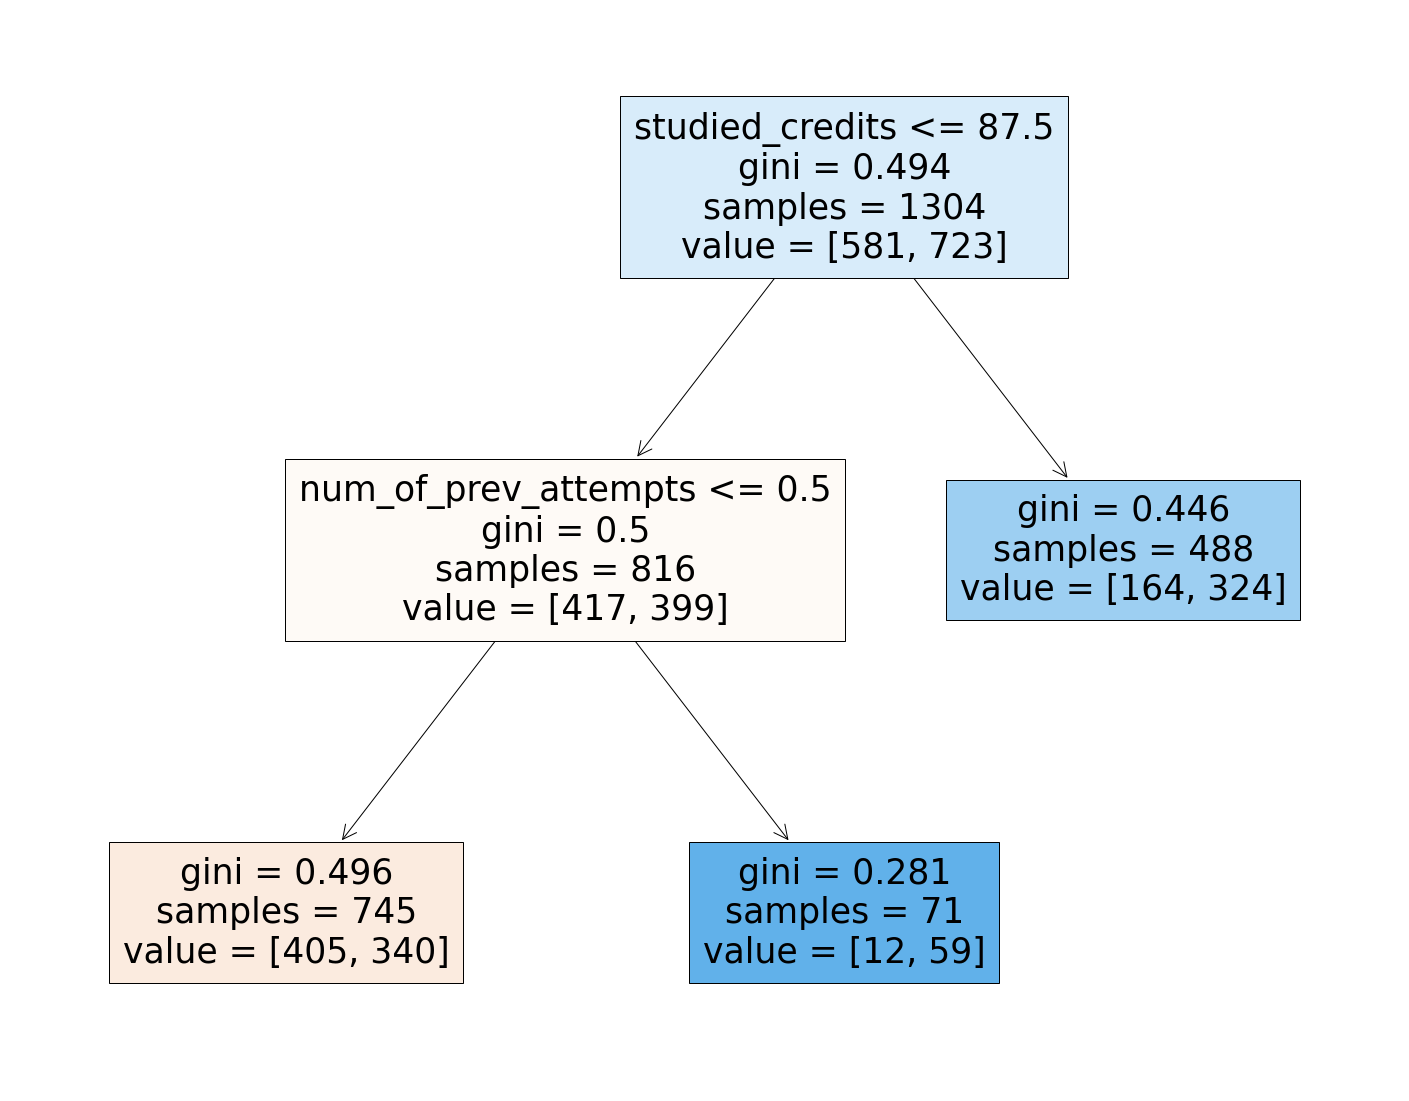

In [48]:
fig = plt.figure(figsize=(25,20))
fig_plot= tree.plot_tree(model, 
                   feature_names=dataset.drop(['final_result'],axis=1).columns,  
                         
                   filled=True)

In [49]:
pred=model.predict(x_test)
accuracy_score(y_test, pred)

0.5797546012269938

In [52]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.53      0.61       200
           1       0.47      0.67      0.55       126

    accuracy                           0.58       326
   macro avg       0.59      0.60      0.58       326
weighted avg       0.62      0.58      0.58       326



<AxesSubplot:>

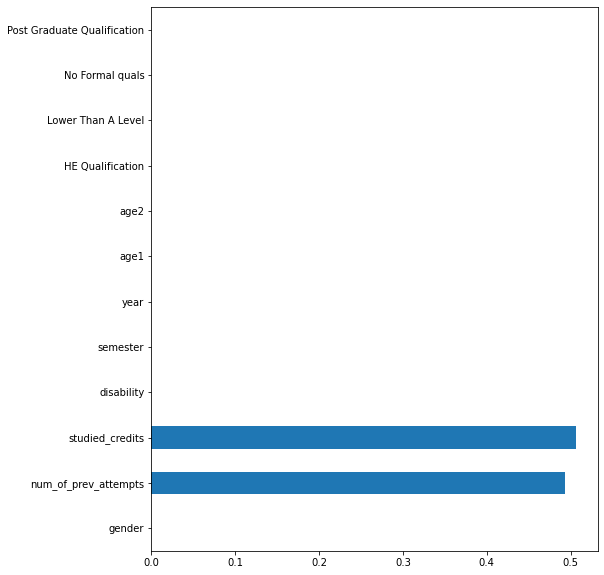

In [51]:
feat_imp = pd.Series(model.feature_importances_, index=x_train.columns)
feat_imp.plot(kind='barh', figsize=(8,10))

# K Nearest Neighbor

In [75]:
# K Nearest Neighbor
hyperparameters = dict( n_neighbors=np.arange(1,50,2))
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(dataset.drop(['final_result'],axis=1),dataset['final_result'])
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 30
Best p: 2
Best n_neighbors: 43


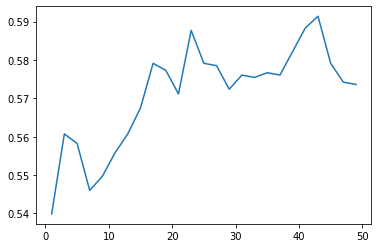

In [77]:
plt.plot(range(1,50,2),clf.cv_results_['mean_test_score'])

In [53]:
model = KNeighborsClassifier(n_neighbors=17,leaf_size=30,p=2)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print('The accuracy of the KNeighbors Classifier is', accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))

The accuracy of the KNeighbors Classifier is 0.5828220858895705
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       171
           1       0.55      0.64      0.59       155

    accuracy                           0.58       326
   macro avg       0.59      0.59      0.58       326
weighted avg       0.59      0.58      0.58       326



# LOGISTIC REGRESSION

In [117]:
x=dataset.drop(['final_result'],axis=1).values
y=dataset['final_result'].valuess

In [119]:
#x=x.values
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    model=LogisticRegression(solver='lbfgs')
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

0.5526954976528199
0.5839330809217945
0.6035246630049572
0.6056564964411943
0.6355419250121941
Average:  0.596270332606592


In [120]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       144
           1       0.68      0.66      0.67       182

    accuracy                           0.63       326
   macro avg       0.63      0.63      0.63       326
weighted avg       0.64      0.63      0.64       326



# Linear discriminant analysis

In [123]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(x):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    model = LinearDiscriminantAnalysis()
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

0.5526954976528199
0.5875191239935186
0.6007111266707081
0.6061311705825372
0.6121314070849001
Average:  0.5918376651968968


In [124]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       144
           1       0.65      0.68      0.66       182

    accuracy                           0.61       326
   macro avg       0.61      0.61      0.61       326
weighted avg       0.61      0.61      0.61       326



In [131]:

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [128]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [137]:
layers = [(20), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [32, 64], epochs=[30,50,100])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [138]:
grid_result = grid.fit(x_train, y_train)

In [139]:
grid_result.best_score_,grid_result.best_params_

(0.6035278558731079,
 {'activation': 'sigmoid', 'batch_size': 32, 'epochs': 50, 'layers': (40, 20)})

In [142]:
pred=grid_result.best_estimator_.predict(x_test)

In [145]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59       144
           1       0.68      0.61      0.64       182

    accuracy                           0.62       326
   macro avg       0.62      0.62      0.62       326
weighted avg       0.63      0.62      0.62       326



# SUMMARY
1. The neural network performs good.
2. The precision and recall are nearly good.